In [2]:
from fastai.tabular import *
import pandas as pd
import numpy as np

In [8]:
trn_df = pd.read_csv('train.csv',index_col='ID_code')
tst_df = pd.read_csv('test.csv',index_col='ID_code')

In [9]:
trn_1 = trn_df.loc[trn_df.target == 1,:][:1]

In [10]:
trn_1.shape

(1, 201)

In [11]:
trn_0 = trn_df.where(trn_df.target == 0)[:1]

In [12]:
trn = trn_1.append(trn_0,ignore_index=True)

In [13]:
trn

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,1.0,16.3699,1.5934,16.7395,7.333,12.1450,5.9004,4.8222,20.9729,1.1064,...,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
1,0.0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914


In [115]:
trn.target = trn.target.astype(int)

In [117]:
procs = [Normalize]

In [120]:
data = (TabularList.from_df(trn,procs=procs,cont_names=tst_df.columns)
        .split_none()
       .label_from_df('target')
       .add_test(TabularList.from_df(tst_df))
       .databunch(bs=2,num_workers=16))

In [193]:
learn = tabular_learner(data,[200,160,50,8],metrics=accuracy)

In [194]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=200, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=160, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=160, out_features=50, bias=True)
    (7): ReLU(inplace)
    (8): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=50, out_features=8, bias=True)
    (10): ReLU(inplace)
    (11): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Linear(in_features=8, out_features=2, bias=True)
  )
)

In [11]:
def net_block(in_,out):
    return nn.Sequential(nn.Linear(in_,out),
                     nn.ReLU(inplace=True),
                     nn.BatchNorm1d(out))

In [12]:
def net_full(layers):
    net_blks = []
    for i in range(0,len(layers)-1):
        net_blks.append(net_block(layers[i],layers[i+1]))
    return nn.Sequential(*net_blks)

In [13]:
class Mod(nn.Module):
    def __init__(self,layers):
        super().__init__()
        net_blks = []
        for i in range(0,len(layers)-1):
            net_blks.append(net_block(layers[i],layers[i+1]))
        self.mod = nn.Sequential(*net_blks)
        
    def forward(self,A,B):
          model.train()
          return self.mod(B)

In [14]:
model = Mod([200,350,200,100,64,8,2])

In [15]:
model

Mod(
  (mod): Sequential(
    (0): Sequential(
      (0): Linear(in_features=200, out_features=350, bias=True)
      (1): ReLU(inplace)
      (2): BatchNorm1d(350, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Sequential(
      (0): Linear(in_features=350, out_features=200, bias=True)
      (1): ReLU(inplace)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Sequential(
      (0): Linear(in_features=200, out_features=100, bias=True)
      (1): ReLU(inplace)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): Sequential(
      (0): Linear(in_features=100, out_features=64, bias=True)
      (1): ReLU(inplace)
      (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (4): Sequential(
      (0): Linear(in_features=64, out_features=8, bias=True)
      (1): ReLU(inplace)
      (2): BatchNorm1d(8, eps=1e-05, 

In [16]:
learn = Learner(data,model)

In [17]:
learn.loss_func

FlattenedLoss of MSELoss()

In [18]:
learn.data.train_ds[1]

(TabularLine var_0 -1.7234; var_1 -0.3241; var_2 0.5436; var_3 -2.0165; var_4 -1.7738; var_5 -0.4404; var_6 0.5599; var_7 -0.3222; var_8 0.2411; var_9 1.1596; var_10 1.5049; var_11 0.4603; var_12 0.6784; var_13 1.0803; var_14 1.3216; var_15 0.8580; var_16 0.9895; var_17 1.1742; var_18 -1.0610; var_19 0.9643; var_20 -1.8033; var_21 -0.3970; var_22 -0.2815; var_23 -1.3109; var_24 -0.3802; var_25 1.6699; var_26 -1.4741; var_27 0.9733; var_28 0.8026; var_29 -0.8921; var_30 -0.9944; var_31 0.1412; var_32 -0.9246; var_33 -1.1979; var_34 0.2089; var_35 1.5432; var_36 0.0233; var_37 0.1394; var_38 1.3588; var_39 -0.8749; var_40 -1.7698; var_41 -0.0308; var_42 -0.6612; var_43 -0.6593; var_44 -1.2545; var_45 1.3811; var_46 -0.1079; var_47 0.6098; var_48 -0.4024; var_49 -0.3427; var_50 1.4485; var_51 0.1387; var_52 -0.6190; var_53 -0.2177; var_54 1.2029; var_55 -1.5492; var_56 2.3668; var_57 1.0199; var_58 -1.5361; var_59 1.5929; var_60 -0.7603; var_61 0.6935; var_62 -1.4791; var_63 0.0609; var_6

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


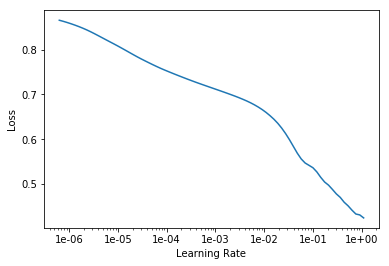

In [23]:
learn.recorder.plot()

In [256]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [178]:
learn.fit_one_cycle(100,max_lr=.1)

In [185]:
learn.fit(20,lr=.1)

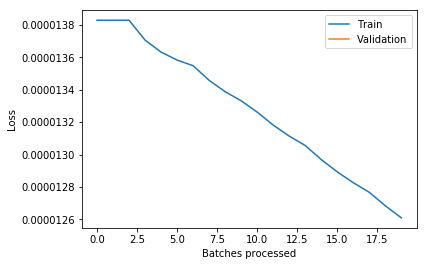

In [190]:
learn.recorder.plot_losses()

In [203]:
p = learn.get_preds(DatasetType.Train)

In [202]:
learn.load('../exps/models/exp1')

Learner(data=TabularDataBunch;

Train: LabelList (2 items)
x: TabularList
var_0 0.7071; var_1 0.7071; var_2 0.7071; var_3 0.7071; var_4 0.7071; var_5 0.7071; var_6 -0.7071; var_7 0.7071; var_8 0.7071; var_9 0.7071; var_10 -0.7071; var_11 -0.7071; var_12 -0.7071; var_13 0.7071; var_14 -0.7071; var_15 0.7071; var_16 0.7071; var_17 0.7071; var_18 0.7071; var_19 -0.7071; var_20 0.7071; var_21 0.7071; var_22 -0.7071; var_23 0.7071; var_24 -0.7071; var_25 0.7071; var_26 -0.7071; var_27 -0.7071; var_28 0.7071; var_29 0.7071; var_30 -0.7071; var_31 -0.7071; var_32 0.7071; var_33 -0.7071; var_34 -0.7071; var_35 -0.7071; var_36 -0.7071; var_37 -0.7071; var_38 0.7071; var_39 -0.7071; var_40 0.7071; var_41 0.7071; var_42 0.7071; var_43 -0.7071; var_44 -0.7071; var_45 0.7071; var_46 0.7071; var_47 -0.7071; var_48 -0.7071; var_49 0.7071; var_50 0.7071; var_51 -0.7071; var_52 -0.7071; var_53 0.7071; var_54 0.7071; var_55 -0.7071; var_56 0.7071; var_57 -0.7071; var_58 0.7071; var_59 -0.7071; var_60 -0

In [204]:
p[0].shape

torch.Size([2, 2])

In [205]:
p = p[0].cpu().numpy();
p

array([[3.408107e-03, 9.965919e-01],
       [9.999009e-01, 9.910943e-05]], dtype=float32)

In [206]:
k = p.argmax(axis=1);
k

array([1, 0])

In [207]:
act = learn.data.train_ds.y.items;
act

array([1, 0])

In [184]:
act = act.astype(int);
act

array([1, 0])

In [95]:
act.shape,k.shape

((15,), (14,))

In [87]:
(act == k).mean()

/home/ravi/miniconda3/envs/fastpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


AttributeError: 'bool' object has no attribute 'mean'

In [ ]:
from fastai.callbacks import CSVLogger

In [3]:
tn = pd.read_csv('exps/history.csv',index_col='epoch')

In [4]:
tn.head(2)

,train_loss,valid_loss,accuracy,time
epoch,,,,
0,0.331241,0.335422,0.8976,NaN
1,0.323125,0.330346,0.8976,NaN


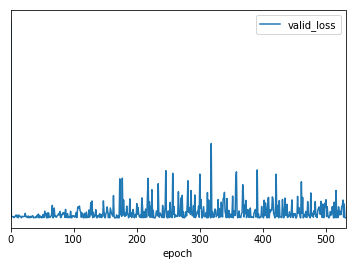

In [5]:
tn.plot(y=['valid_loss'],logy=True)

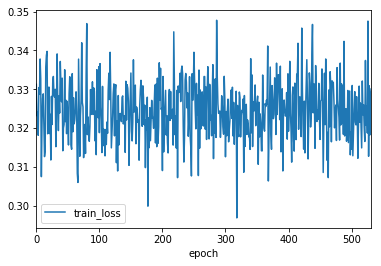

In [6]:
tn.plot(y=['train_loss'])

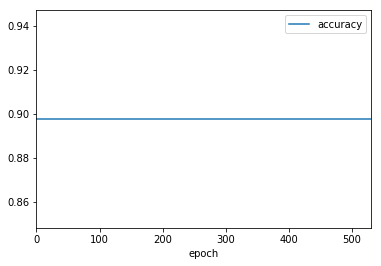

In [7]:
tn.plot(y=['accuracy'])

In [1]:
#p = learn.get_preds(DatasetType.Valid)